In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Set the path to the CSV file
file_path = r'C:\Users\r_mat\OneDrive\Documents\GitHub\Project_1\Data\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [2]:
# Check for missing values in the DataFrame
missing_values = crime_data.isnull().sum()

# Display the count of missing values for each column
missing_values[missing_values > 0]

Mocodes           118311
Vict Sex          112606
Vict Descent      112614
Premis Cd             10
Premis Desc          518
Weapon Used Cd    556202
Weapon Desc       556202
Crm Cd 1              11
Crm Cd 2          790429
Crm Cd 3          850837
Crm Cd 4          852888
Cross Street      717289
dtype: int64

In [3]:
# Drop columns with a large number of missing values
columns_to_drop = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
crime_data = crime_data.drop(columns=columns_to_drop)

# Impute missing values for specific columns
columns_to_impute = ['Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc']
for column in columns_to_impute:
    if crime_data[column].dtype == 'O':
        # For categorical columns, fill with the mode
        crime_data[column].fillna(crime_data[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the median
        crime_data[column].fillna(crime_data[column].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Mocodes     118311
Crm Cd 1        11
dtype: int64

In [4]:
# Impute missing values for 'Mocodes' and 'Crm Cd 1'
crime_data['Mocodes'].fillna('', inplace=True)  # Assuming Mocodes is a text column, fill with an empty string
crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0], inplace=True)  # Fill with the mode for 'Crm Cd 1'

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Series([], dtype: int64)

In [5]:
# Overview of crime counts by area
crime_counts_by_area = crime_data['AREA NAME'].value_counts()

# Display the top 10 areas with the highest crime counts
top_areas = crime_counts_by_area.head(10)
print("Top 10 Areas with the Highest Crime Counts:")
print(top_areas)

# Overview of crime counts by crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Display the top 10 crime types with the highest counts
top_crime_types = crime_counts_by_type.head(10)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)

Top 10 Areas with the Highest Crime Counts:
AREA NAME
Central        57691
77th Street    53631
Pacific        49850
Southwest      47858
Hollywood      45018
Southeast      43357
Olympic        42979
Newton         42743
N Hollywood    42455
Wilshire       40648
Name: count, dtype: int64

Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Nam

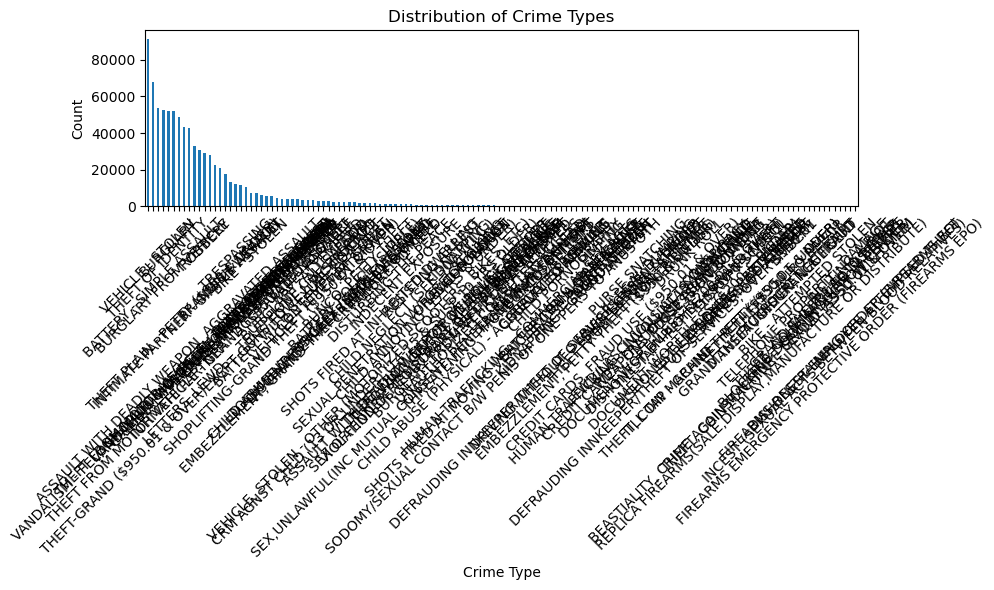

In [6]:
# Pie chart or bar plot showing the distribution of crime types.
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()
plt.figure(figsize=(10, 6))
crime_counts_by_type.plot(kind='bar')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Distribution of Crime Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

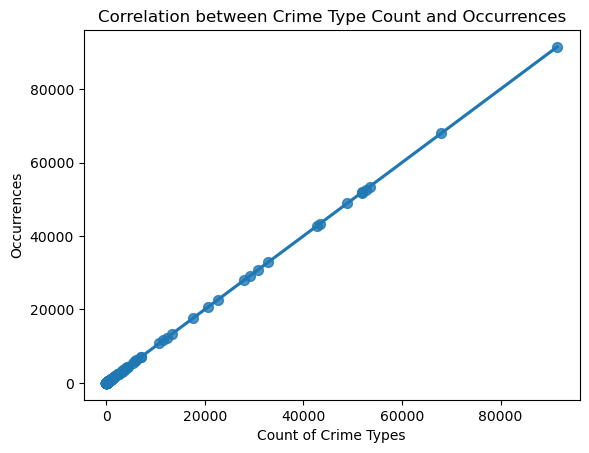

In [7]:
#Scatter plot with a linear regression line to explore the correlation between the crime type and its occurrence.
crime_type_counts = crime_data['Crm Cd Desc'].value_counts()
crime_type_occurrences = crime_data.groupby('Crm Cd Desc').size()
# Create a DataFrame with crime type counts and occurrences
crime_type_data = pd.DataFrame({'Count': crime_type_counts, 'Occurrences': crime_type_occurrences})
# Scatter plot with linear regression
sns.regplot(data=crime_type_data, x='Count', y='Occurrences', scatter_kws={"s": 50})
plt.xlabel('Count of Crime Types')
plt.ylabel('Occurrences')
plt.title('Correlation between Crime Type Count and Occurrences')
plt.show()

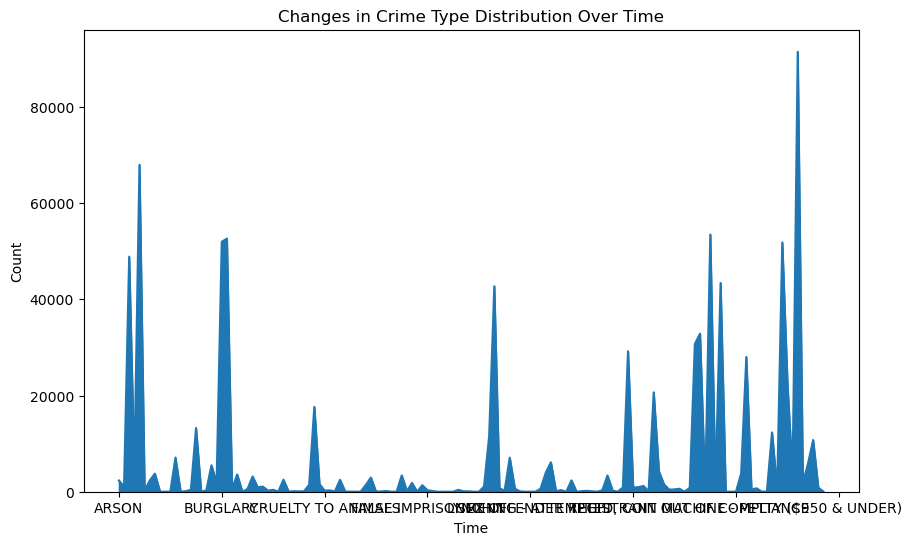

In [8]:
# Stacked area chart or grouped bar plot showing changes in the distribution of crime types.
crime_type_occurrences.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Changes in Crime Type Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

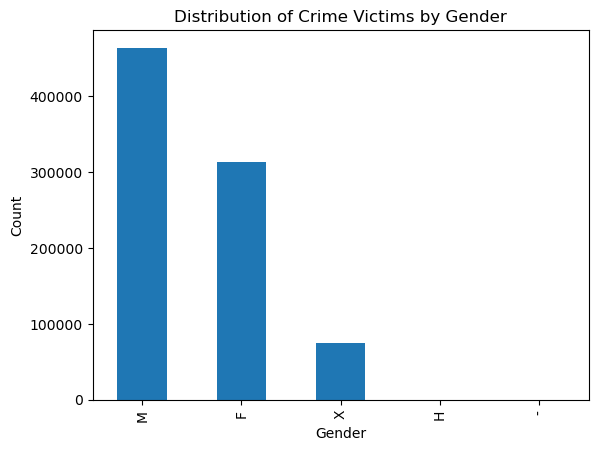

In [9]:
# Count plot or Pie chart showing the distribution of crime victims by gender

crime_data['Vict Sex'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Crime Victims by Gender')
plt.show()

In [11]:
# Scatter plot with a linear regression line exploring the correlation between the age of the victim and the count of a specific crime type

sns.regplot(crime_data=crime_data, x='Vict Age', y='Specific Crime Type Count')

plt.xlabel('Age of Victim')
plt.ylabel('Count of Specific Crime Type')
plt.title('Correlation between Age of Victim and Specific Crime Type Count')
plt.show()

TypeError: regplot() got an unexpected keyword argument 'crime_data'

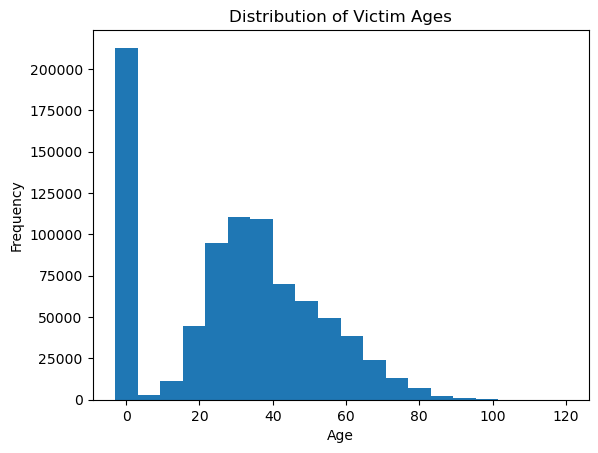

In [12]:
# Histogram or Kernel Density Plot showing the distribution of victim ages

crime_data['Vict Age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')
plt.show()

In [13]:
# Stacked bar plot or Heatmap showing the correlation between crime types and victim demographics

crime_data_cross = pd.crosstab(crime_data['Victim Demographics'], crime_data['Crime Type'])
crime_data_cross.plot(kind='bar', stacked=True)
plt.xlabel('Victim Demographics')
plt.ylabel('Count')
plt.title('Crime Type Distribution by Victim Demographics')
plt.legend(title='Crime Type')
plt.show()

KeyError: 'Victim Demographics'